### CNN

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight

# Parameters
IMG_SIZE = (64, 64)
DATA_PATH = 'dataset/'
CLASSES = ['Active', 'Sleepy', 'Yawn', 'NoYawn']

# Load images and labels
def load_dataset():
    images = []
    labels = []
    for idx, class_name in enumerate(CLASSES):
        folder_path = os.path.join(DATA_PATH, class_name)
        for file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, IMG_SIZE)
                images.append(img)
                labels.append(idx)
    return np.array(images), np.array(labels)

X, y = load_dataset()
X = X.astype('float32') / 255.0
y_cat = to_categorical(y, num_classes=4)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, stratify=y_cat, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(rotation_range=15, zoom_range=0.1,
                             width_shift_range=0.1, height_shift_range=0.1,
                             horizontal_flip=True)
datagen.fit(X_train)

# Compute class weights
y_labels = np.argmax(y_train, axis=1)
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_labels),
                                                  y=y_labels)
class_weights = dict(enumerate(class_weights))

# Build CNN model
def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_model()

# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=20,
                    class_weight=class_weights,
                    callbacks=[early_stop])

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy with CNN: {test_acc * 100:.2f}%')
print(f'Test loss with CNN: {test_loss:.2f}')


Epoch 1/20


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


165/165 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - accuracy: 0.5866 - loss: 1.0189 - val_accuracy: 0.9027 - val_loss: 0.2807
Epoch 2/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 13s 78ms/step - accuracy: 0.8720 - loss: 0.4031 - val_accuracy: 0.9323 - val_loss: 0.2123
Epoch 3/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.8982 - loss: 0.3165 - val_accuracy: 0.9475 - val_loss: 0.1675
Epoch 4/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.9164 - loss: 0.2542 - val_accuracy: 0.9597 - val_loss: 0.1320
Epoch 5/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 14s 82ms/step - accuracy: 0.9246 - loss: 0.2265 - val_accuracy: 0.9582 - val_loss: 0.1297
Epoch 6/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.9323 - loss: 0.1846 - val_accuracy: 0.9620 - val_loss: 0.1187
Epoch 7/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.9443 - loss: 0.1687 - val_accuracy: 0.9703 - val_loss: 0.0950
Epoch 8/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step - accuracy: 0.9330 - loss: 0.1844 - val_accurac

In [2]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,822,542 (14.58 MB)

 Trainable params: 1,274,180 (4.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,548,362 (9.72 MB)

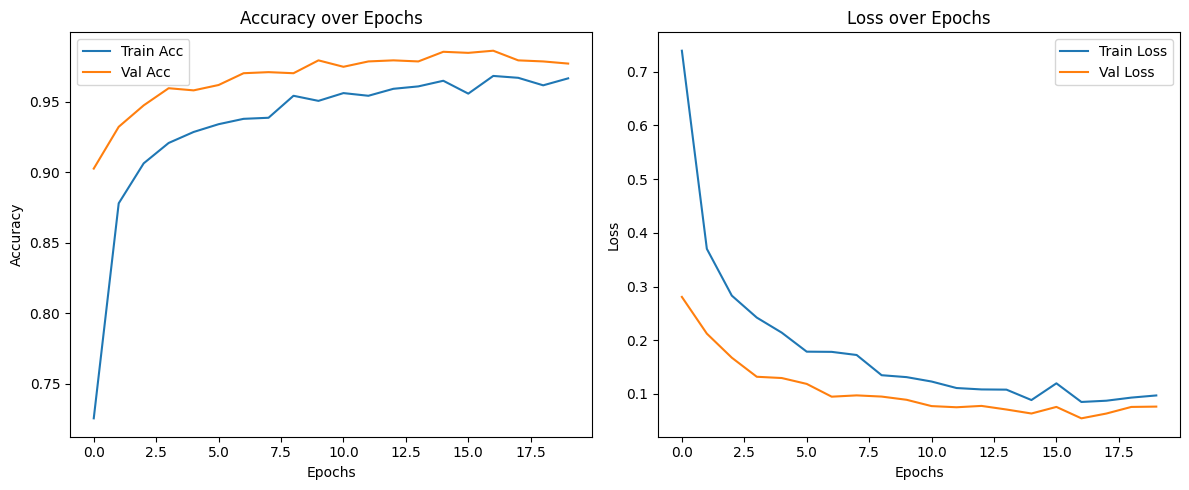

In [3]:
import matplotlib.pyplot as plt

# Training accuracy & loss
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
              precision    recall  f1-score   support

      Active       0.99      1.00      1.00       145
      Sleepy       0.98      0.99      0.98       145
        Yawn       0.98      0.99      0.99       506
      NoYawn       0.99      0.98      0.98       519

    accuracy                           0.99      1315
   macro avg       0.99      0.99      0.99      1315
weighted avg       0.99      0.99      0.99      1315



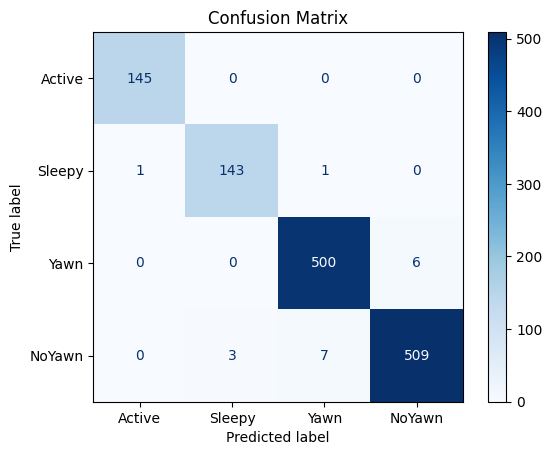

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=CLASSES))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASSES)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


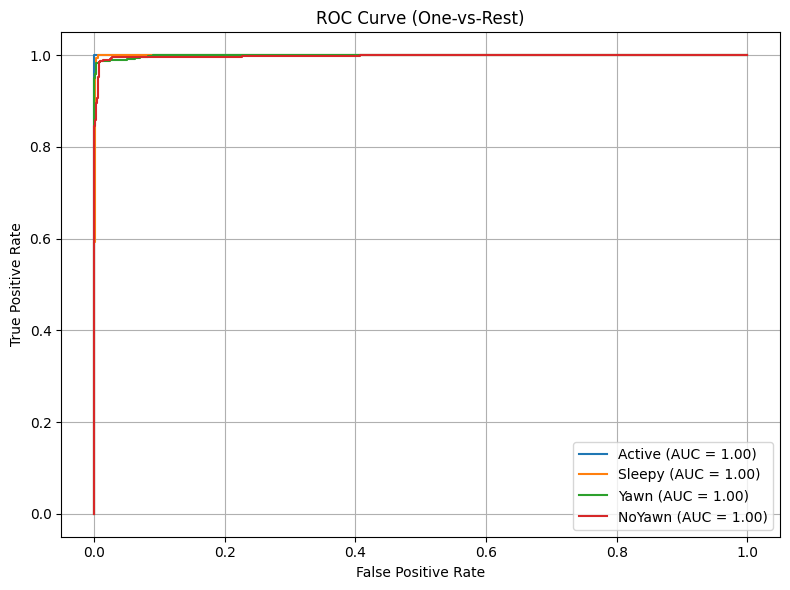

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

CLASSES = ['Active', 'Sleepy', 'Yawn', 'NoYawn']
NUM_CLASSES = len(CLASSES)

# Get true labels and predictions
y_true = np.argmax(y_test, axis=1)          # Convert one-hot to labels
y_pred = model.predict(X_test)              # Predicted probabilities

# Binarize the true labels
y_true_bin = label_binarize(y_true, classes=list(range(NUM_CLASSES)))

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(NUM_CLASSES):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{CLASSES[i]} (AUC = {roc_auc:.2f})")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


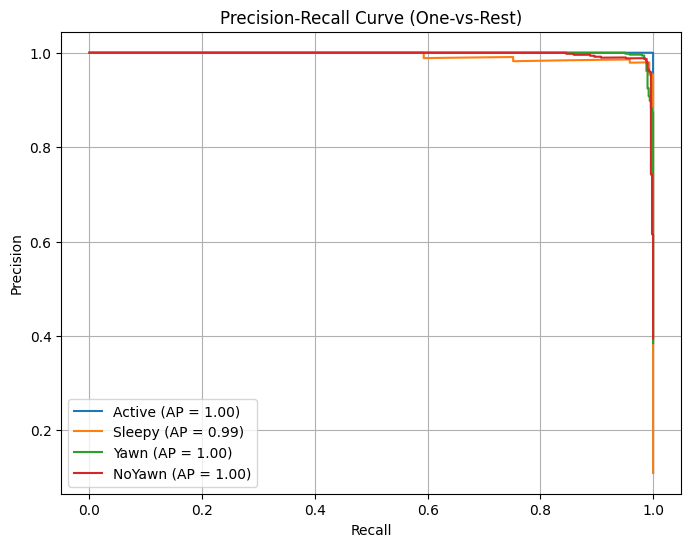

In [9]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(8, 6))
for i in range(NUM_CLASSES):
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_pred[:, i])
    ap_score = average_precision_score(y_true_bin[:, i], y_pred[:, i])
    plt.plot(recall, precision, label=f"{CLASSES[i]} (AP = {ap_score:.2f})")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (One-vs-Rest)')
plt.legend()
plt.grid()
plt.show()


In [10]:
model.save('cnn_model.h5')

42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step


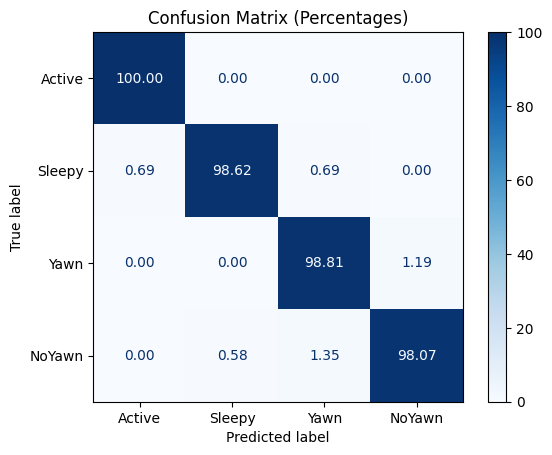

In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Parameters
IMG_SIZE = (64, 64)
DATA_PATH = 'dataset/'
CLASSES = ['Active', 'Sleepy', 'Yawn', 'NoYawn']

# Load images and labels
def load_dataset():
    images = []
    labels = []
    for idx, class_name in enumerate(CLASSES):
        folder_path = os.path.join(DATA_PATH, class_name)
        for file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, IMG_SIZE)
                images.append(img)
                labels.append(idx)
    return np.array(images), np.array(labels)

X, y = load_dataset()
X = X.astype('float32') / 255.0
y_cat = to_categorical(y, num_classes=4)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, stratify=y_cat, random_state=42)

# Load the trained model
model = load_model('cnn_model.h5')

# Predict labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix - Normalize row-wise
cm = confusion_matrix(y_true, y_pred_classes, normalize='true')  # Normalize each row
cm_percentage = cm * 100  # Convert to percentage

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_percentage, display_labels=CLASSES)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")  # Display as percentage with 2 decimals
plt.title('Confusion Matrix (Percentages)')
plt.show()


### MobileNetV2

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Parameters
IMG_SIZE = (96, 96)
BATCH_SIZE = 32
CLASSES = ['Active', 'Sleepy', 'Yawn', 'NoYawn']
NUM_CLASSES = len(CLASSES)
DATA_PATH = 'dataset/'

# Load and preprocess dataset
def load_dataset():
    images = []
    labels = []
    for idx, class_name in enumerate(CLASSES):
        folder_path = os.path.join(DATA_PATH, class_name)
        for file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, IMG_SIZE)
                images.append(img)
                labels.append(idx)
    return np.array(images), np.array(labels)

X, y = load_dataset()
X = X.astype('float32') / 255.0
y_cat = to_categorical(y, num_classes=NUM_CLASSES)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, stratify=y_cat, random_state=42)

# Class weights
y_labels = np.argmax(y_train, axis=1)
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_labels),
                                                  y=y_labels)
class_weights = dict(enumerate(class_weights))

# Data Augmentation
datagen = ImageDataGenerator(rotation_range=15,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True)
datagen.fit(X_train)

# Load MobileNetV2 base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# Freeze base model
base_model.trainable = False

# Custom classification head
inputs = Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs, outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),
                    validation_data=(X_test, y_test),
                    epochs=20,
                    class_weight=class_weights,
                    callbacks=[early_stop])

# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy with MobileNetV2: {acc * 100:.2f}%")
print(f"Test loss with MobileNetV2: {loss:.2f}")


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 70s 343ms/step - accuracy: 0.6421 - loss: 0.9940 - val_accuracy: 0.9118 - val_loss: 0.2475
Epoch 2/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 51s 306ms/step - accuracy: 0.9114 - loss: 0.2270 - val_accuracy: 0.9430 - val_loss: 0.1732
Epoch 3/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 54s 327ms/step - accuracy: 0.9328 - loss: 0.1733 - val_accuracy: 0.9544 - val_loss: 0.1537
Epoch 4/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 52s 315ms/step - accuracy: 0.9424 - loss: 0.1424 - val_accuracy: 0.9551 - val_loss: 0.1448
Epoch 5/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 52s 314ms/step - accuracy: 0.9394 - loss: 0.1640 - val_accuracy: 0.9574 - val_loss: 0.1271
Epoch 6/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 54s 326ms/step - accuracy: 0.9504 - loss: 0.1256 - val_accuracy: 0.9506 - val_loss: 0.1445
Epoch 7/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 52s 313ms/step - accuracy: 0.9585 - loss: 0.1055 - val_accuracy: 0.9498 - val_loss: 0.1401
Epoch 8/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 52s 312ms/step - accuracy: 0.9596 - loss: 0

42/42 ━━━━━━━━━━━━━━━━━━━━ 15s 249ms/step
              precision    recall  f1-score   support

      Active       0.93      0.99      0.96       145
      Sleepy       0.96      0.94      0.95       145
        Yawn       0.97      0.97      0.97       506
      NoYawn       0.97      0.96      0.97       519

    accuracy                           0.97      1315
   macro avg       0.96      0.97      0.96      1315
weighted avg       0.97      0.97      0.97      1315



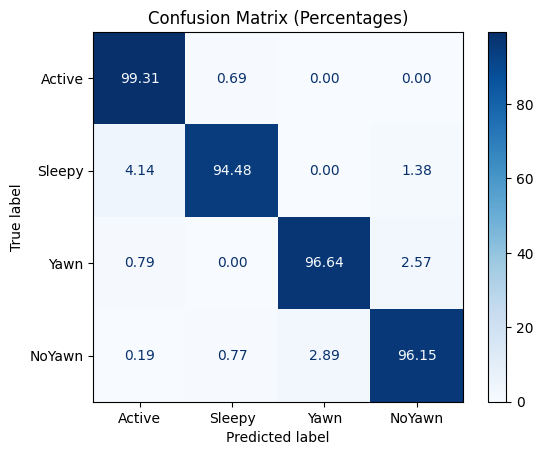

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=CLASSES))

# Confusion Matrix - Normalize row-wise
cm = confusion_matrix(y_true, y_pred_classes, normalize='true')  # normalize='true' makes row-wise percentages
cm_percentage = cm * 100  # Convert to percentage

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_percentage, display_labels=CLASSES)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")  # Display values as percentages with 2 decimal places
plt.title('Confusion Matrix (Percentages)')
plt.show()


In [4]:
model.save('mobilenetv2_model.h5')

### InceptionV3

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import tensorflow as tf

# Parameters
IMG_SIZE = (299, 299)  # Required for InceptionV3
BATCH_SIZE = 32
CLASSES = ['Active', 'Sleepy', 'Yawn', 'NoYawn']
NUM_CLASSES = len(CLASSES)
DATA_PATH = 'dataset/'

# Load and preprocess dataset
def load_dataset():
    images = []
    labels = []
    for idx, class_name in enumerate(CLASSES):
        folder_path = os.path.join(DATA_PATH, class_name)
        for file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, IMG_SIZE)
                images.append(img)
                labels.append(idx)
    return np.array(images), np.array(labels)

# Load and preprocess data
X, y = load_dataset()
X = preprocess_input(X.astype('float32'))  # Inception expects values in [-1, 1]

# Train/test split
X_train, X_test, y_train_raw, y_test_raw = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
y_train = to_categorical(y_train_raw, num_classes=NUM_CLASSES)
y_test = to_categorical(y_test_raw, num_classes=NUM_CLASSES)

# Class weights
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train_raw),
                                                  y=y_train_raw)
class_weights = dict(enumerate(class_weights))

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    brightness_range=[0.8, 1.2],
    horizontal_flip=False,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Load InceptionV3 base model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
base_model.trainable = False  # Initially freeze

# Custom classification head with regularization
inputs = Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
outputs = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs, outputs)

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Phase 1: Train top layers only
model.fit(datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),
          validation_data=(X_test, y_test),
          epochs=10,
          class_weight=class_weights,
          callbacks=[early_stop, lr_scheduler])

# Final evaluation
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy with InceptionV3: {acc * 100:.2f}%")
print(f"Test Loss with InceptionV3: {loss:.2f}")


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 851s 5s/step - accuracy: 0.7305 - loss: 0.8878 - val_accuracy: 0.9589 - val_loss: 0.3164 - learning_rate: 0.0010
Epoch 2/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 910s 6s/step - accuracy: 0.9232 - loss: 0.3813 - val_accuracy: 0.9582 - val_loss: 0.2651 - learning_rate: 0.0010
Epoch 3/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 1024s 6s/step - accuracy: 0.9341 - loss: 0.3170 - val_accuracy: 0.9612 - val_loss: 0.2462 - learning_rate: 0.0010
Epoch 4/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 1320s 8s/step - accuracy: 0.9409 - loss: 0.2795 - val_accuracy: 0.9719 - val_loss: 0.2115 - learning_rate: 0.0010
Epoch 5/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 537s 3s/step - accuracy: 0.9461 - loss: 0.2490 - val_accuracy: 0.9681 - val_loss: 0.2004 - learning_rate: 0.0010
Epoch 6/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 539s 3s/step - accuracy: 0.9525 - loss: 0.2266 - val_accuracy: 0.9734 - val_loss: 0.1867 - learning_rate: 0.0010
Epoch 7/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 543s 3s/step - accuracy: 0.9541 - loss: 

42/42 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step
              precision    recall  f1-score   support

      Active       0.99      0.98      0.98       145
      Sleepy       0.97      0.97      0.97       145
        Yawn       0.95      0.98      0.97       506
      NoYawn       0.98      0.95      0.97       519

    accuracy                           0.97      1315
   macro avg       0.97      0.97      0.97      1315
weighted avg       0.97      0.97      0.97      1315



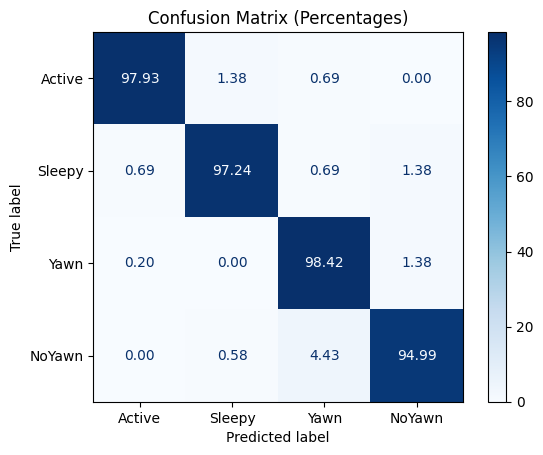

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=CLASSES))

# Confusion Matrix - Normalize row-wise
cm = confusion_matrix(y_true, y_pred_classes, normalize='true')  # normalize='true' makes row-wise percentages
cm_percentage = cm * 100  # Convert to percentage

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_percentage, display_labels=CLASSES)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")  # Display values as percentages with 2 decimal places
plt.title('Confusion Matrix (Percentages)')
plt.show()


In [3]:
model.save('inceptionv3_model.h5')

### VGG19